## Air Freight Infrastructure

We use the data from

https://ec.europa.eu/eurostat/databrowser/view/avia_if_arp/default/table?lang=en

https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/avia_if_arp.tsv.gz


In [1]:
data_file = "assets/airfreight-infra/avia_if_arp.tsv"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
df = pd.read_csv(data_file, sep="\t", na_values=": ")

df.rename(columns=dict(zip(
    df.columns,
    [col.strip() for col in df.columns]
)), inplace=True)

In [4]:
df["country"] = df["tra_infr,geo\\time"].apply(lambda x: x.split(",")[-1])
df["infra"] = df["tra_infr,geo\\time"].apply(lambda x: x.split(",")[0])

In [5]:
df.infra.unique()

array(['AIRP', 'AIRP_MAIN', 'AIRP_OTH'], dtype=object)

In [6]:
df["2017"].unique()

array([ 6.,  5.,  4.,  2., 41.,  8., 33., 38., 18., 62.,  7.,  3., 35.,
        1., 39., 12., 13., 11., nan, 30., 50., 42., 24., 22., 34.,  9.,
       44., 17., 32.,  0., 10.])

In [7]:
df.loc[df.infra == "AIRP"]["2017"].sum()

507.0

In [8]:
df.loc[df.infra == "AIRP_MAIN"]["2017"].sum()

365.0

In [9]:
df.loc[df.infra == "AIRP_OTH"]["2017"].sum()

142.0

Text(0, 0.5, 'Airports')

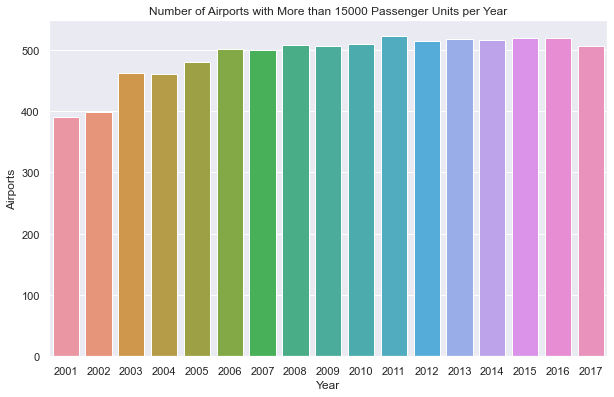

In [10]:
fig, ax = plt.subplots(figsize=(10,6.18))

sns.barplot(
    x="index",
    y="sum",
    data = pd.DataFrame(
        df.loc[df.infra == "AIRP"].drop(columns=["tra_infr,geo\\time", "country", "infra"]).sum().sort_index(),
        columns=["sum"]
    ).reset_index(),
    ax=ax
)

ax.set_title("Number of Airports with More than 15000 Passenger Units per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Airports")

### Freight and Mail Traffic

https://ec.europa.eu/eurostat/databrowser/view/avia_gooac/default/table?lang=en

In [11]:
df_freight = pd.read_csv("assets/airfreight-infra/estat_avia_gooac.tsv", sep="\t")

In [12]:
df_freight.loc[
    df_freight["2019-Q4 "] > 0
].dropna()

,"freq,unit,tra_meas,rep_airp,partner\TIME_PERIOD",2019-Q4
0,"Q,T,FRM_BRD,AT_LOWG,EU28",22
3,"Q,T,FRM_BRD,AT_LOWL,EU28",2500
4,"Q,T,FRM_BRD,AT_LOWS,EU28",9
5,"Q,T,FRM_BRD,AT_LOWW,EU28",22926
6,"Q,T,FRM_BRD,BE_EBAW,EU28",333
...,...,...
414,"Q,T,FRM_BRD,UK_EGPR,EU28",3
415,"Q,T,FRM_BRD,UK_EGPU,EU28",15
416,"Q,T,FRM_BRD,UK_EGSH,EU28",63
417,"Q,T,FRM_BRD,UK_EGSS,EU28",27362
